Importing important libraries for analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

**Step1:** Reading data

In [9]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\arora\AppData\Local\Temp\ipykernel_42832\2192646864.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018963 entries, 0 to 2018962
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [13]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [15]:
# checking for any missing data
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           628067
ZIP CODE                          628305
LATITUDE                          229727
LONGITUDE                         229727
LOCATION                          229727
ON STREET NAME                    425008
CROSS STREET NAME                 755889
OFF STREET NAME                  1686327
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6351
CONTRIBUTING FACTOR VEHICLE 2     308070
CONTRIBUTING FACTOR VEHICLE 3    1875772
CONTRIBUTING FACTOR VEHICLE 4    1986822
CONTRIBUTING FACTOR VEHICLE 5    2010288
COLLISION_ID                           0
VEHICLE TYPE COD

**Step 2:** Cleaning data <br>
As we see above, there is huge amount of missing data in 'BOROUGH' and 'ZIP CODE' column.<br>It is better to fill it with 'Unknown' value.

In [17]:
df['BOROUGH'].fillna('Unknown', inplace=True)
df['ZIP CODE'].fillna('Unknown', inplace=True)

C:\Users\arora\AppData\Local\Temp\ipykernel_42832\3255890502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BOROUGH'].fillna('Unknown', inplace=True)
C:\Users\arora\AppData\Local\Temp\ipykernel_42832\3255890502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [19]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,Unknown,Unknown,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,Unknown,Unknown,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,Unknown,Unknown,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


Now, as 'LATITUDE' and 'LONGITUDE' columns are important and only ~10% of data values are missing in these columns.<br>
We can safely drop rows with null values of 'LATITUDE' and 'LONGITUDE'.

In [21]:
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [23]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
6,12/14/2021,17:05,Unknown,Unknown,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN


As these columns are not that important for our analysis.<br> We can drop off these columns.

In [25]:
df.drop('ON STREET NAME', axis=1, inplace=True)
df.drop('OFF STREET NAME', axis=1, inplace=True)
df.drop('CROSS STREET NAME', axis=1, inplace=True)

In [26]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",0.0,0.0,0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
6,12/14/2021,17:05,Unknown,Unknown,40.709183,-73.956825,"(40.709183, -73.956825)",0.0,0.0,0,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,0,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",0.0,0.0,0,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN


Now, Filling null values for Number of Persons Killed and Injured as 0.

In [29]:
df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].fillna(0, inplace=True)

C:\Users\arora\AppData\Local\Temp\ipykernel_42832\3538717811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].fillna(0, inplace=True)


In [31]:
# dropping location column as we already have latitude and longitude
df.drop('LOCATION', axis=1, inplace=True)

Dropping these columns due to very huge amount of missing data and also, these columns are not that important.<br> Making these reduntant columns

In [33]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

In [35]:
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unknown', inplace=True)
df['VEHICLE TYPE CODE 1'].fillna('Unknown', inplace=True)
df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unknown', inplace=True)
df['VEHICLE TYPE CODE 2'].fillna('Unknown', inplace=True)

C:\Users\arora\AppData\Local\Temp\ipykernel_42832\2810861090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unknown', inplace=True)
C:\Users\arora\AppData\Local\Temp\ipykernel_42832\2810861090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [37]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,0,0,0,0,Unspecified,Unknown,4456314,Sedan,Unknown
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,0,0,0,0,Unknown,Unknown,4486609,Unknown,Unknown
6,12/14/2021,17:05,Unknown,Unknown,40.709183,-73.956825,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486555,Sedan,Tractor Truck Diesel
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,Unknown


In [39]:
# checking for missing values again
df.isnull().sum()

CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
ZIP CODE                          0
LATITUDE                          0
LONGITUDE                         0
NUMBER OF PERSONS INJURED        16
NUMBER OF PERSONS KILLED         28
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
COLLISION_ID                      0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789236 entries, 3 to 2018962
Data columns (total 19 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   NUMBER OF PERSONS INJURED      float64
 7   NUMBER OF PERSONS KILLED       float64
 8   NUMBER OF PEDESTRIANS INJURED  int64  
 9   NUMBER OF PEDESTRIANS KILLED   int64  
 10  NUMBER OF CYCLIST INJURED      int64  
 11  NUMBER OF CYCLIST KILLED       int64  
 12  NUMBER OF MOTORIST INJURED     int64  
 13  NUMBER OF MOTORIST KILLED      int64  
 14  CONTRIBUTING FACTOR VEHICLE 1  object 
 15  CONTRIBUTING FACTOR VEHICLE 2  object 
 16  COLLISION_ID                   int64  
 17  VEHICLE TYPE CODE 1            object 
 18  VEHICLE

In [160]:
# converting data types for better use

In [47]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')

In [49]:
df['CRASH TIME'] = df['CRASH TIME'].dt.time

Droping duplicates rows if any

In [51]:
df.drop_duplicates(inplace=True)

In [53]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,0,0,0,0,Unspecified,Unknown,4456314,Sedan,Unknown
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,0,0,0,0,Unknown,Unknown,4486609,Unknown,Unknown
6,2021-12-14,17:05:00,Unknown,Unknown,40.709183,-73.956825,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486555,Sedan,Tractor Truck Diesel
7,2021-12-14,08:17:00,BRONX,10475.0,40.868160,-73.831480,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan
8,2021-12-14,21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,Unknown


Now, we have cleaned our data. We will start our analysis.<br>
**Step 3:** Data Analysis

**Number of Crashes per Year**

Objective: Show the trend of motor vehicle collisions over time.

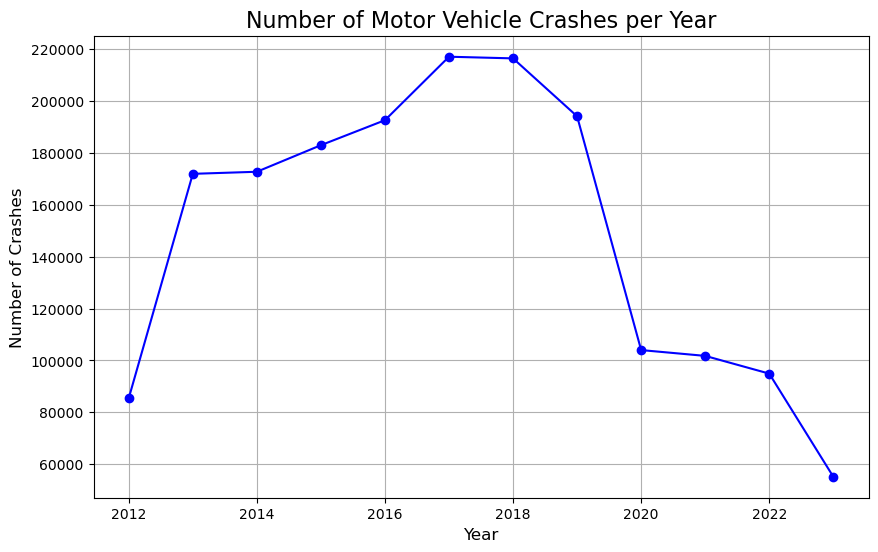

In [55]:
df['YEAR'] = df['CRASH DATE'].dt.year
crashes_per_year = df.groupby('YEAR').size()

# line chart to visualize the trend
plt.figure(figsize=(10,6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Number of Motor Vehicle Crashes per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)

plt.grid(True)
# Saving the plot as png
plt.savefig('crashes_per_year.png')
plt.show()

**Conclusion 1:**  
The number of motor vehicle crashes per year was highest around **2017** and **2018**.

- We observed a sharp increase in the number of crashes from **2012 (`~`82,0000) to 2013 (`~`170,000)**, which represents an approximate **107% increase**.
- Similarly, there was a steep decline in the number of crashes  **2019 (`~`195,000) to 2020 (`~`102,000)**, marking an approximate **47% decrease**.     

**Crashes per Borough**

Objective: Compare the number of crashes across different boroughs.

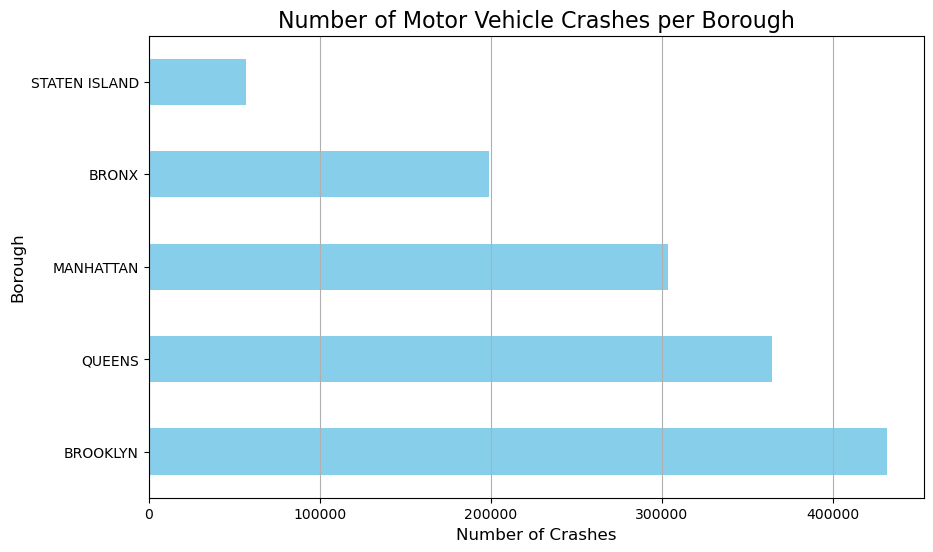

In [57]:
filtered_data = df[df['BOROUGH'] != 'Unknown']
crashes_per_borough = filtered_data['BOROUGH']. value_counts()

plt.figure(figsize=(10,6))
crashes_per_borough.plot(kind='barh', color='skyblue')

plt.title('Number of Motor Vehicle Crashes per Borough', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=12)
plt.ylabel('Borough', fontsize=12)

plt.grid(True, axis='x')
plt.savefig('crashes_per_borough.png')
plt.show()

**Conclusion 2:**  
The number of motor vehicle crashes varies significantly across different boroughs. **Brooklyn** reported the highest number of crashes with approximately **431,000**, followed by **Queens** with around **364,000** crashes. In contrast, **Staten Island** had the lowest number of crashes at about **57,000**


**Time of Day Analysis**

Objective: Understand when crashes are most frequent (morning, afternoon, night).

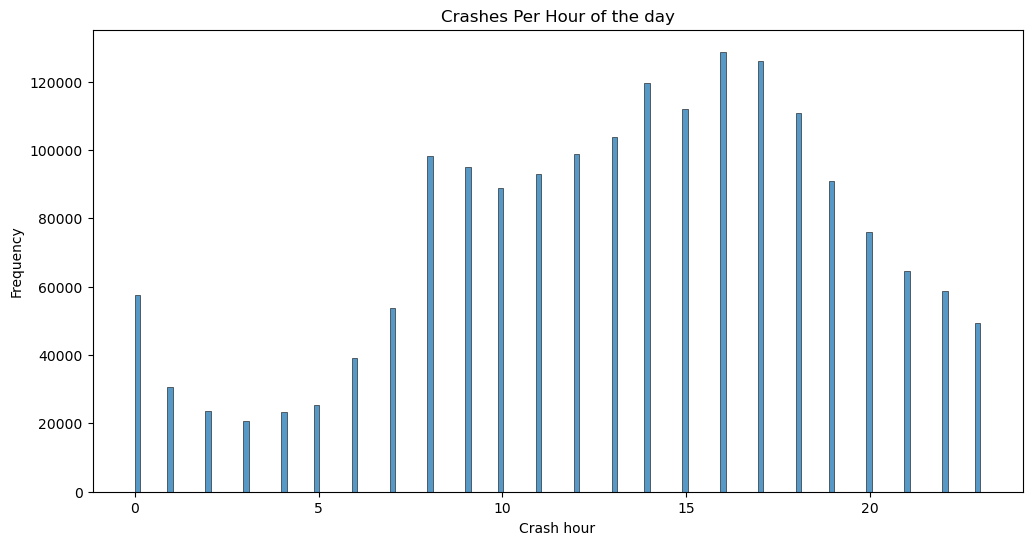

In [59]:
df['CRASH HOUR'] = df['CRASH TIME'].apply(lambda x: x.hour)

plt.figure(figsize=(12,6))
sns.histplot(df['CRASH HOUR'])

plt.title('Crashes Per Hour of the day')
plt.xlabel('Crash hour')
plt.ylabel('Frequency')
plt.savefig('crashes_per_hour.png')
plt.show()

**Conclusion 3:**  
Motor vehicle crashes tend to peak during late afternoon and early evening hours. The highest number of crashes occurs at **4 PM (~128,000)** and **5 PM (~126,000)**, likely corresponding to peak traffic times. In contrast, the lowest number of crashes is recorded at **3 AM (~20,000)** and **4 AM (~23,000)**, during off-peak hours.


**Number of Injuries and Deaths**

Objective: Visualize the severity of crashes by analyzing injuries and deaths.

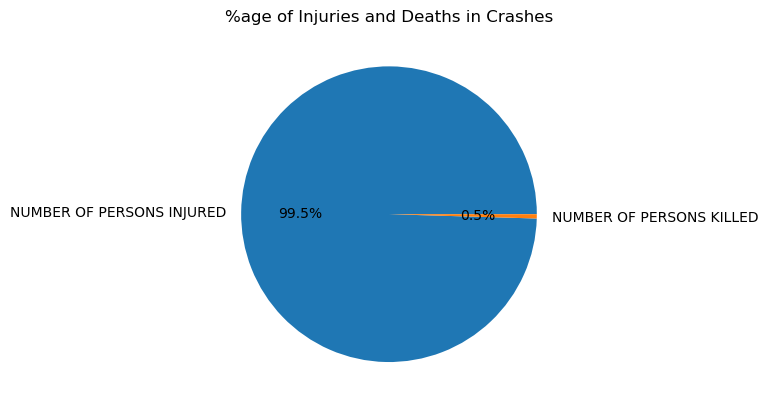

In [63]:
injuries_deaths = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()
injuries_deaths.iloc[0] = ( injuries_deaths.iloc[0] / injuries_deaths.sum() ) * 100
injuries_deaths.iloc[1] = 100 - injuries_deaths.iloc[0]

# plotting pie chart for number of persons injured vs killed
injuries_deaths.plot(kind='pie', autopct='%1.1f%%')

plt.title('%age of Injuries and Deaths in Crashes', fontsize=12)
plt.savefig('percentage_of_injuries_vs_deaths.png')
plt.show()

**Conclusion 4:**  
The overwhelming majority of motor vehicle collisions resulted in injuries, with approximately **99.5%** of the affected individuals being injured. In contrast, fatalities were relatively rare, accounting for only **0.5%** of the total incidents.


**Contributing Factors for Crashes**

Objective: Identify the most common contributing factors to crashes (e.g., driver inattention, speeding).

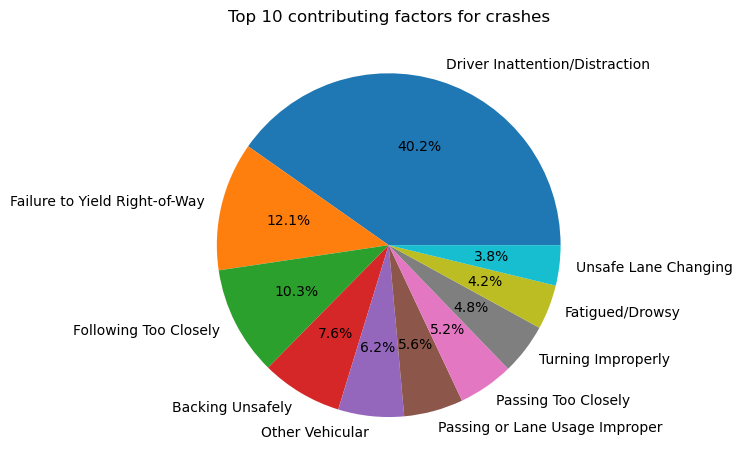

In [67]:
contributing_factors = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
contributing_factors.plot(kind='pie',autopct='%1.1f%%')

plt.title('Top 10 contributing factors for crashes')
plt.ylabel('')
plt.tight_layout()
plt.savefig('top10_contributing_factors.png')
plt.show()

**Conclusion 5:**
Hence, we can conclude from pie chart above that most common reason for the crash is **Driver Inattention/Distraction** which accounts for **40.2%** of the crashes, followed by 'Failure to yield Right-of-Way' which is 12.1% wheras the least common reason for the crash is **Unsafe Lane Changing** which accounts only for **3.8%** crashes.

**Crashes Involving Cyclists, Pedestrians, and Motorists**

Objective: Analyze the type of individuals involved in crashes..

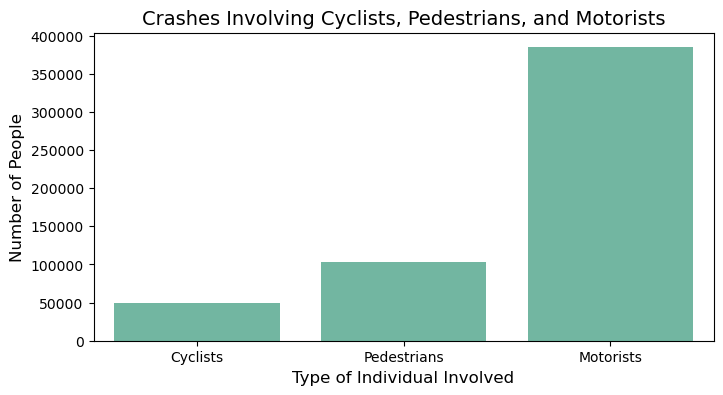

In [71]:
crash_type_data = pd.DataFrame({
    'Type': ['Cyclists', 'Pedestrians', 'Motorists'],
    'Category': ['Injuries', 'Injuries', 'Injuries'],
    'Count': [
        df['NUMBER OF CYCLIST INJURED'].sum(),
        df['NUMBER OF PEDESTRIANS INJURED'].sum(),
        df['NUMBER OF MOTORIST INJURED'].sum()
    ]
})

plt.figure(figsize=(8, 4))
sns.barplot(data=crash_type_data, x='Type', y='Count', hue='Category', palette='Set2')

plt.legend().remove()
plt.title('Crashes Involving Cyclists, Pedestrians, and Motorists', fontsize=14)
plt.xlabel('Type of Individual Involved', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

plt.savefig('crashes_per_type_of_individual.png')
plt.show()

**Conclusion 6:**
The number of injuries in crashes is highest among motorists at 384,708, followed by pedestrians with 103,465 injuries. Cyclists have the fewest injuries, totaling 48,965. This suggests that motorists are more frequently involved in crashes resulting in injuries compared to pedestrians and cyclists.

**Monthly crashes**

Objective: Analyze if crashes peak during certain months or seasons.

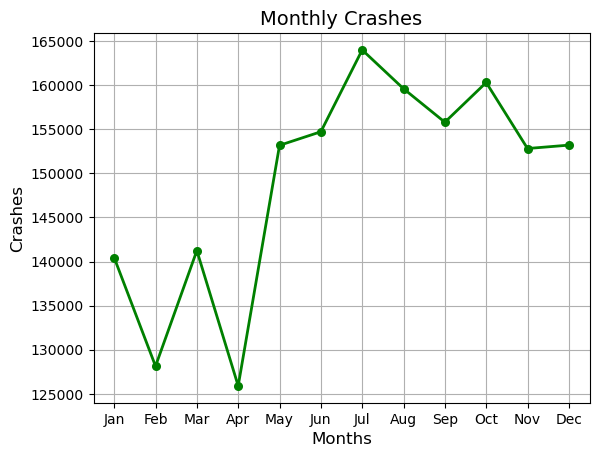

In [75]:
dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['MONTH'] = df['CRASH DATE'].dt.month
crash_by_month = pd.DataFrame(df.groupby('MONTH').size()).reset_index().rename(columns={'MONTH':'month' ,0:'value'})
crash_by_month['month'] = crash_by_month['month'].apply(lambda x: dict[x])

sns.pointplot(data=crash_by_month, x='month', y='value', lw=2, ls='-', color='green')

plt.grid(True, axis='both')
plt.title('Monthly Crashes', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Crashes', fontsize=12)

plt.savefig('monthly_crashes.png')
plt.show()

**Conclusion 7:**

The number of crashes is highest during July with 163,983 incidents, followed closely by August at 159,587. The lowest number of crashes occurs in April, with 125,899 incidents. This suggests that crash occurrences tend to peak during the summer months, with July and August experiencing the most crashes, while the early spring month of April shows the lowest activity.

**Injury and Death Severity over Time**

Objective: Show how crash severity has changed over the years.

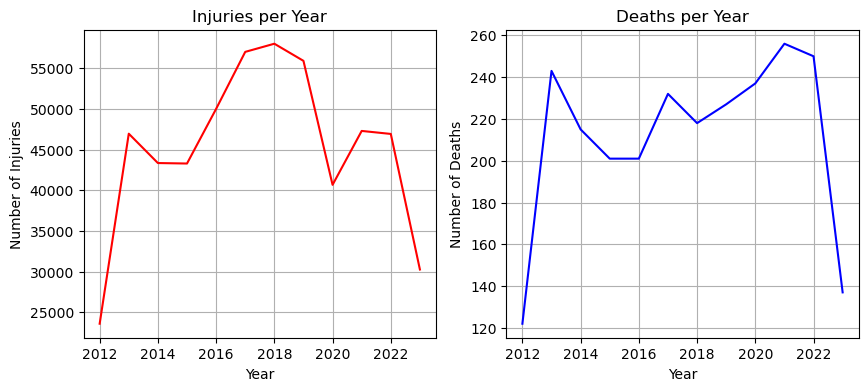

In [79]:
injuries_per_year = df.groupby('YEAR')['NUMBER OF PERSONS INJURED'].sum()
deaths_per_year = df.groupby('YEAR')['NUMBER OF PERSONS KILLED'].sum()

injuries_per_year = pd.DataFrame(injuries_per_year.values, index=injuries_per_year.index).reset_index().rename(columns={0: 'value'})
deaths_per_year = pd.DataFrame(deaths_per_year.values, index=deaths_per_year.index).reset_index().rename(columns={0: 'value'})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].plot(injuries_per_year['YEAR'], injuries_per_year['value'], 'red')
axes[0].set_title('Injuries per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Injuries')

axes[1].plot(deaths_per_year['YEAR'], deaths_per_year['value'], 'blue')
axes[1].set_title('Deaths per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Deaths')

axes[0].grid(True)
axes[1].grid(True)

plt.savefig('injuries_deaths_over_years.png')
plt.show()

**Conclusion 8:**

The number of injuries per year has shown a general increasing trend, peaking at 58,016 in 2018, with a notable drop to 30,248 in 2023. 2018 had the highest number of injuries at 58,016.

In contrast, the number of deaths per year has fluctuated with a peak in 2021 at 256 deaths. The lowest recorded number of deaths was in 2012, with 122 deaths. The data indicates a trend of higher fatalities in recent years compared to the early years, despite a drop in 2023.

Overall, while the number of injuries generally increased until 2018 before declining, the number of deaths exhibited more variability but showed a concerning increase in recent years.

**Crash Severity by Time of Day**

Objective: Show if certain times of day are more prone to severe crashes.

In [109]:
# defining pivot table
pt = df.pivot_table(index='CRASH HOUR', values=['NUMBER OF PERSONS INJURED'], aggfunc='sum')
pt['NUMBER OF PERSONS INJURED'] = pt['NUMBER OF PERSONS INJURED'].apply(lambda x: x/1000)

# renaming columns 
pt.rename(columns={'NUMBER OF PERSONS INJURED': 'NUMBER OF PERSONS INJURED (IN THOUSANDS)'})

,NUMBER OF PERSONS INJURED (IN THOUSANDS)
CRASH HOUR,
0,20.189
1,11.084
2,8.894
3,7.936
4,9.200
5,8.671
6,12.290
7,16.818
8,26.143


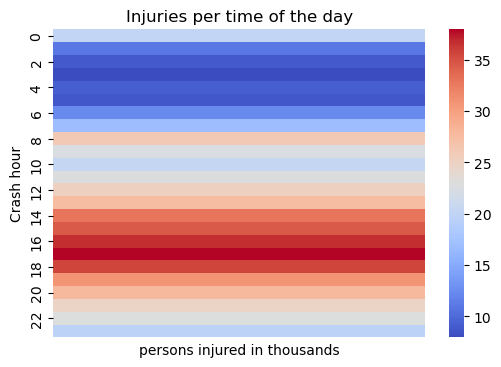

In [147]:
plt.figure(figsize=(6,4))
sns.heatmap(pt, cmap='coolwarm', xticklabels=False)

plt.title('Injuries per time of the day')
plt.xlabel('persons injured in thousands')
plt.ylabel('Crash hour')

plt.savefig('severity_by_time_of_day.png')
plt.show()

**Conclusion 9:**

The number of persons injured in motor vehicle crashes varies significantly throughout the day. The injuries start increasing during early morning hours, peaking in the late afternoon and evening.

**Key Points:** <br>
**Peak Injuries:** The highest number of injuries occurs during 17:00 (5 PM) with approximately 37.9K injuries.<br>
**Steady Rise:** Injuries begin to significantly rise from 13:00 (1 PM) to 17:00 (5 PM), indicating increased crash activity in the afternoon.<br>
**Morning Activity:** Injury counts start picking up at 06:00 (6 AM) and consistently increase throughout the day.<br>
**Low Injuries:** Early morning hours, particularly between 00:00 (12 AM) and 05:00 (5 AM), experience the lowest number of injuries, with the lowest at 03:00 (3 AM) (7.9K).<br>

This trend shows that crashes with injuries are more likely to occur during peak commuting hours.

**Final Concluding Statement:**

The analysis of motor vehicle crashes in New York over the past decade reveals critical patterns and insights that highlight the temporal, geographical, and human factors influencing crash occurrences and their severity. The highest concentration of crashes is observed during peak traffic hours, particularly in the late afternoon, while injuries and fatalities predominantly involve motorists, with pedestrians and cyclists also at significant risk. The borough-wise data underscores the variation in crash rates across regions, with Brooklyn witnessing the most incidents. Additionally, the trends in both injuries and fatalities show concerning fluctuations, with a sharp rise in injuries until 2018 followed by a notable decline, while fatalities saw an increase in recent years.

**Ending Line:** 

In summary, this analysis provides valuable insights into crash patterns that can inform policymakers, city planners, and public safety officials in developing more targeted interventions to enhance road safety and reduce crash occurrences in New York.